# K-means clustering - Homework

In the tutorial, we have seen how to choose the number of clusters using the elbow method. However, we have also noticed that it does not always work very well. Let us study another method based on the prediction strength.

To know more about it, you can read the paper: Tibshirani, R. and Walther, G. (2005) Cluster validation by prediction strength. Journal of Computational and Graphical Statistics 14(3):511-528.

In this homework, we are going to  use the function KMeans from the SciKitLearn package. See here for the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

## Prediction strength

Suppose we have a dataset of $X = \left\{ x_{i , j} \right\}$ of $n$ observations of $d$-dimensional variables. Let us divide these observations into a train set $X_{tr}$ and a test set $X_{te}$ of size $n_{tr}$ and $n_{te}$ respectively.

Let us choose the number of clusters $k$, and apply clustering to both the training data and the test data independently.

Let us now denote $A_{1} , A_{2} , \cdots , A_{k}$ the indices of the test observations in the test clusters $1 , 2 , \cdots , k$, and $n_{1} , n_{2} , \cdots , n_{k}$ the number of observations in these clusters.

We now consider the clusters obtained with the training data, and denote this classifying operation $C \left( X_{tr} \right)$. We now apply this classifying operation to the test set. 

Let us now denote $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right]$ the $n_{te}$ by $n_{te}$ matrix which $i i'$ element $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ is equal to $1$ if observations $i$ and $i'$ from the $j$th cluster of the test set fall into the same training set cluster, and $0$ otherwise. The prediction strength is then defined by:

$ps \left( k \right) = \min_{ 1 \leq j \leq k} \frac{1}{n_{j} \left( n_{j } - 1 \right)} \sum_{i \neq i' \in A_{j}} D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ (**eq 1**)

## Data gathering and cleaning

Import useful Python packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import cos, sin, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Set seed for reproducibility

In [3]:
random.seed(0)

Import data from the PNSN earthquake catalog.

In [4]:
catalog = pd.read_csv('pnsn_catalog.csv')
catalog.drop(columns=['Evid', 'Magnitude', 'Magnitude Type', 'Epoch(UTC)', 'Time UTC', 'Time Local', 'Distance From', 'Depth Mi'], inplace=True)
catalog.columns = ['latitude', 'longitude', 'depth']
catalog.head()

,latitude,longitude,depth
0,47.6808,-121.5155,86.8
1,49.6035,-120.6457,2.3
2,47.4605,-121.6465,15.6
3,48.1063,-121.9423,34.7
4,46.1998,-122.1818,2.4


Apply PCA and normalization.

In [5]:
data = catalog.to_numpy()
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
scaler = preprocessing.StandardScaler().fit(data_pca)
data_scaled = scaler.transform(data_pca)
print(data_scaled)

[[ 7.27207811 -0.54996484]
 [-0.74988938 -2.0406105 ]
 [ 0.51108899 -0.5889752 ]
 ...
 [-0.12674159  0.13996097]
 [ 0.790767   -0.288608  ]
 [-0.93341486 -0.27905588]]


## Homework

### Question 1 (1 point)

Write code to divide the data into a training set and a test set of approximately the same size.

In [6]:
x_train, x_test = train_test_split(data_scaled, test_size = 0.5, shuffle = False)
print(x_train)

[[ 7.27207811 -0.54996484]
 [-0.74988938 -2.0406105 ]
 [ 0.51108899 -0.5889752 ]
 ...
 [-0.49450382 -0.71857488]
 [-0.32662547  0.6113005 ]
 [-1.04734392 -0.29341885]]


### Question 2 (2 points)

For now, we choose to have k = 2 clusters.

Write code to apply K-means clustering to the training set and the test set using the Kmeans function from ScikitLearn.

In [7]:
kmeans = KMeans(n_clusters = 2)

train_K = kmeans.fit(x_train)
test_K = kmeans.fit(x_test)

### Question 3 (2 points)

Get the clusters for the test set.

In [8]:
clusters = test_K.labels_
centroids= test_K.cluster_centers_
print(clusters)

[0 0 0 ... 0 0 0]


Plot the data from the test set with two different colors for the two clusters.

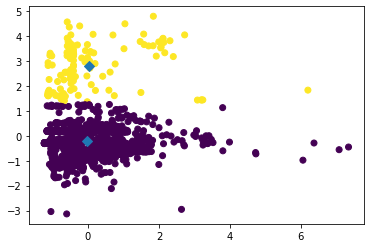

In [9]:
plt.scatter(x_test[:,0], x_test[:,1] , c = clusters)          #Assign the data colors based on cluster labels

centroids_x = centroids[:,0]                                  #Create centroids for the clusters
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)   #Create and show plot visualizing the two clusters
plt.show()

### Question 4 (2 points)

Use the clustering and centroids from the training set to predict to which cluster the data points from the test set should belong.

In [10]:
test_predict = train_K.predict(x_test)                  #Using the Kmeans used on the training data set on the testing set
print(test_predict)

[0 0 0 ... 0 0 0]


Plot the data from the test set with two different colors for the two clusters.

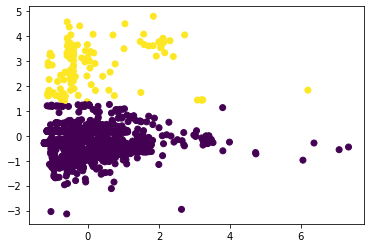

In [11]:
plt.scatter(x_test[:,0], x_test[:,1], c = test_predict)
plt.show()

### Question 5

Compute the prediction strength for $k$ = 2 as defined at the beginning. Hint: use **eq 1** with nested loops

In [12]:
count = 0
for i in clusters:                               #nested for loop to calculate prediction strength
    for j in clusters:                                                               
        if i != j:                               #if the indices are the same then do not run the if statement                     
            if clusters[i] == clusters[j] & test_predict[i] == test_predict[j]:   #if the cluster labelfor a pair is the same for the test_model       
                count+= 1                                                         #and the predict_model, than 1 is added to the count
        
print(count)
pred_strength = count/(2 * (2-1))               #Calculate predicton strength
print(pred_strength)

387816
193908.0


### Question 6

Write a function that does steps 1 to 5 for any number $k$ of clusters and return the prediction strength or a given $k$ number of clusters. 

In [13]:
def KMEANS (data,k):
    
    #Function that takes in data and an amount of clusters
    #runs kmeans functions 
    #and returns a prediction strength value
    
    
    x_train, x_test = train_test_split(data, test_size = 0.5, shuffle = False)
    
    kmeans = KMeans(n_clusters = k)

    train_K = kmeans.fit(x_train)
    test_K = kmeans.fit(x_test)
    
    model_test = test_K.labels_
    model_predict = train_K.predict(x_test)
    
    count = 0

    for i in model_test:
        for j in model_test:
            if i != j:
                if model_test[i] == model_test[j] & model_predict[i] == model_predict[j]:
                    count+= 1
    pred_strength = count/(k * (k-1))
    
    return pred_strength

### Question 7

Apply this function to $k = 2, \cdots , 20$.

In [15]:
array = np.arange(2,21,1)                                             #Create an array from 2-20 to run in the for loop
for i in array:                                                       #For loop to run the KMEANS function for 2-20 clusters and 
    pred_strengthi = KMEANS(data_scaled, i)                           #calculate and print the prediction strength for each number of clusters
    print("Prediction Strength for k =", i, " is", pred_strengthi)

Prediction Strength for k = 2  is 193908.0
Prediction Strength for k = 3  is 216947.66666666666
Prediction Strength for k = 4  is 26968.5
Prediction Strength for k = 5  is 80860.9
Prediction Strength for k = 6  is 48516.933333333334
Prediction Strength for k = 7  is 24203.52380952381
Prediction Strength for k = 8  is 18767.714285714286
Prediction Strength for k = 9  is 13818.416666666666
Prediction Strength for k = 10  is 5221.0888888888885
Prediction Strength for k = 11  is 5348.309090909091
Prediction Strength for k = 12  is 3496.090909090909
Prediction Strength for k = 13  is 5448.320512820513
Prediction Strength for k = 14  is 4351.67032967033
Prediction Strength for k = 15  is 3244.7619047619046
Prediction Strength for k = 16  is 1908.15
Prediction Strength for k = 17  is 1915.9779411764705
Prediction Strength for k = 18  is 1848.2875816993464
Prediction Strength for k = 19  is 1592.9590643274853
Prediction Strength for k = 20  is 1665.2368421052631


### Question 8

Plot the prediction strength as a function of number of clusters. What is the optimal number of clusters for this dataset?

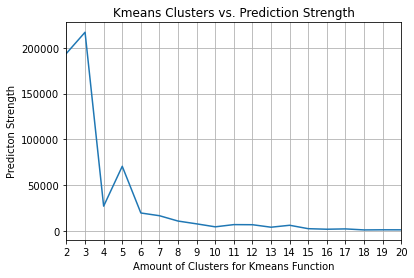

In [18]:
pred_strength_array = np.zeros(19)                       #Create an empty array that will have 19 spots for the 2-20 clusters values
for i in array:                                   
    pred_strength_array[i - 2] = KMEANS(data_scaled,i)   #For every array index, run the KMEANS function for increasing clusters
plt.plot(np.arange(2, 21), pred_strength_array)          #Plotting the prediction strengths for increasing clusters
plt.xlabel("Amount of Clusters for Kmeans Function")
plt.ylabel("Predicton Strength")
plt.title("Kmeans Clusters vs. Prediction Strength")
plt.xlim([2,20])
plt.xticks(array)
plt.grid(True)

The optimal number of clusters for this dataset is 3